# CPSC 122 Github Push Stats


## Hypothesis
#### Null-Hypothesis:

On average, the S2 students did not push more than S1


#### Alt-Hypothesis:

On average, the S2 students push more than S1

## Code
First I am going to import these 4 librarys. I will use these in my analusis of the Github Push Stats


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

Next I set up the two datasets. I'll initialize them as pandas series so it is easier to check my work afterwards.

In [30]:
S1 = pd.Series([15, 50, 0, 5, 0, 2, 0, 0, 0, 2, 0, 7, 0, 0, 0, 3, 0, 0, 12, 15, 0, 1, 0, 0, 0])
S2 = pd.Series([33, 3, 2, 8, 0, 41, 2, 0, 20, 1, 0, 0, 3, 17, 0, 5, 2, 0, 14, 4, 16, 22, 28, 4, 94])



# Stats

Mid Value:

The Mid-Range, also known as MR or Mid-Value, is defined as the arithmetic mean from the largest and smallest values in a sample group.  

$MR = \frac{MAX(X) + MIN(X)}{2}$

Below I will demonstrate 2 ways to calculate the $MR$:
* by hand with no built in functions
* using pandas to obtain the max and min and dividing it by 2

While this is happening I will output the values calculated. Notice how they both result with the same number.

In [31]:
# Not using numpy
# Find the largest and smallest number
smallest = S2[0]
largest = S2[0]
for value in S2:
    if value < smallest:
        smallest = value
    if value > largest:
        largest = value

# Now smallest and largest are their respective values for S2
S2MR = (smallest + largest)/2

print(S2MR)


# Using pandas 
S2MR = (S2.max() + S2.min()) / 2 # ptp means peak to peak. To calculate the MR we need to divide that by 2
print(S2MR)

47.0
47.0


Mean:

The mean, also known as the average, is the summation of all of the values of the set, divided by the amount of values in said set.

$\bar{x} = \frac{\Sigma{x}}{n}$ with n being the size of x

Below I will demonstrate 2 ways to do produce $\bar{S2}$:
* by hand with no built in functions
* using pandas 

In [32]:
# by hand
S2Sum = 0
S2Amount = 0
for value in S2:
    S2Sum += value
    S2Amount += 1
S2Bar = S2Sum / S2Amount

print(S2Bar)

# using pandas
S2Bar = S2.mean()
print(S2Bar)

12.76
12.76


Median:

The median is defined as the middle value of a sorted version of the dataset. This is often used as a more accurate way of finding common results, because it isn't affected by outliers as much as the mean.
$m\left(x\right)
=\begin{cases}
  x_\frac{n+1}{2}                                    & n\text{ odd}\\
  \frac {1}{2}\left(x_{\frac{n}{2}} + x_{\frac{n}{2} + 1}\right) & n \text{ even}
\end{cases}$ with x in order

(The $LaTeX$ visualization was from [this site](https://math.stackexchange.com/questions/1097546/what-is-the-general-formula-for-calculating-the-median))

From here on out, to save space I will no longer calculate the result by hand without numpy, or pandas (I will be using pandas for this demonstration)

In [33]:
S2Median = S2.median()
print(S2Median)

4.0


Mode:

The mode is the most frequently occuring value in the sequence.

The most common way to calculate it is by traversing the dataset and counting the occurances of each value.

Although I do not understand it completely, to stick with formatting the Latex formula according to [this website](https://www.cuemath.com/mean-median-mode-formula/) is:
$$Mode = L + h \dfrac{(f_{m} - f_{1})}{(f_{m} - f_{1}) + (f_{m} - f_{2})}$$

Where:
* '$L$' is the lower limit of the modal class.
* '$h$' is the size of the class interval.
* '$f_{m}$' is the frequency of the modal class.
* '$f_{1}$' is the frequency of the class preceding the modal class.
* '$f_{2}$' is the frequency of the class succeeding the modal class.




In [34]:
S2Mode = S2.mode()[0] # Since .mode() returns a series, we can use [0] to get the first result
print(S2Mode)

0


Range:

The range of a dataset is defined as the distance between the largest and smallest values of a given set of values.

range(x) = $x_{max} - x_{min}$

In [35]:
S2Range = S2.max() - S2.min()
print(S2Range)

94


### Quartiles
The quartiles are defined as "a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations." ([Source](https://www.investopedia.com/terms/q/quartile.asp#:~:text=A%20quartile%20is%20a%20statistical,the%20entire%20set%20of%20observations.))

<img src="https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/screenshot-45-1617945953.png" width="300">

${\displaystyle q(p)=x_{(k)}+\alpha (x_{(k+1)}-x_{(k)})},$

where ${\displaystyle k=[p(n+1)]}{\displaystyle k=[p(n+1)]}$ and ${\displaystyle \alpha =p(n+1)-[p(n+1)]}{\displaystyle \alpha =p(n+1)-[p(n+1)]}$

$LaTeX$ equation from [Wikipedia](https://en.wikipedia.org/wiki/Quartile)

In [36]:
S2Quartiles = S2.quantile([0.25,0.5,0.75])
print("First quartile is",S2Quartiles[0.25])
print("Second quartile is",S2Quartiles[0.50], "(notice how it is the same as the median)")
print("Third quartile is",S2Quartiles[0.75])

First quartile is 1.0
Second quartile is 4.0 (notice how it is the same as the median)
Third quartile is 17.0


Varince (Sample)

The varieance of a dataset is defined as "The formula for variance of a is the sum of the squared differences between each data point and the mean, divided by the number of data values." ([Source](https://www.calculatorsoup.com/calculators/statistics/variance-calculator.php))

$LaTeX$ formula for the Variance of a sample population

$\text{Variance} = s^{2} = \dfrac{\sum_{i=1}^{n}(x_i - \overline{x})^{2}}{n - 1}$
([Source](https://www.calculatorsoup.com/calculators/statistics/variance-calculator.php))


In [37]:
S2Varience = S2.var(ddof=1)
print(S2Varience)

# or by hand just to prove i know how
mean = S2.sum() / len(S2)
sum = 0
for x in S2:
    sum += ((x-mean)**2)
variance = sum / (len(S2) - 1)
print(variance)

420.6899999999999
420.6899999999999


Standard Deviation (Sample)

The standard deviation of a dataset is defined as "Standard deviation measures the spread of a data distribution. It measures the typical distance between each data point and the mean." ([Source](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review))

$s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}$

In [38]:
S2Std = S2.std()
print(S2Std)

# or by hand just to prove i know how
mean = S2.sum() / len(S2)
sum = 0
for x in S2:
    sum += ((x-mean)**2)
variance = sum / (len(S2) - 1)
print (math.sqrt(variance))

20.510728899773405
20.510728899773405


S1 - 95% confidence interval for the population mean

In [39]:
# First we will find the value of t
ddof_S1 = S1.size - 1
two_tailed_value = (1-0.95)
# Now we look up the t value in the t-table with the ddof and two_tailed_value
# i personally got 2.064
t_val = 2.064

# now we divide the std by the sqrt(sample size) and multiply that by t
margin_of_error_S1 = t_val * (S1.std() / math.sqrt(S1.size))
 
print("The upper margin of error for 95% is", S1.mean() + margin_of_error_S1,
"and the lower margin of error for 95% is",S1.mean() - margin_of_error_S1) 

The upper margin of error for 95% is 8.84560803077876 and the lower margin of error for 95% is 0.11439196922124051


In order to check my work I am using a function written by "[CertainBadProgrammer](https://www.codegrepper.com/profile/lyu-ji)" from [this](https://www.codegrepper.com/code-examples/python/sample+margin+of+error+estimate+python+scipy) site.

In [40]:
import numpy as np
import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


In [41]:
# check work with numpy
print(mean_confidence_interval(S1))

(4.48, 0.1146065235678213, 8.845393476432179)


S2 95% confidence interval

In [42]:
# First we will find the value of t
ddof_S2 = S2.size - 1
two_tailed_value = (1-0.95)
# Now we look up the t value in the t-table with the ddof and two_tailed_value
# i personally got 2.064
t_val = 2.064

# now we divide the std by the sqrt(sample size) and multiply that by t
margin_of_error_S2 = t_val * (S2.std() / math.sqrt(S2.size))
 
print("The upper margin of error for 95% is", S2.mean() + margin_of_error_S2,
"and the lower margin of error for 95% is",S2.mean() - margin_of_error_S2) 

The upper margin of error for 95% is 21.22682888982646 and the lower margin of error for 95% is 4.293171110173539


In [43]:
# check work with numpy
print(mean_confidence_interval(S2))

(12.76, 4.29358722516308, 21.22641277483692)


### Visualize both S1 and S2 confidence intervals

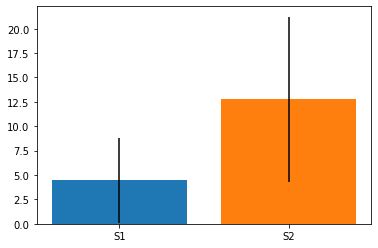

In [44]:
import matplotlib.pyplot as plt
plt.bar([1],S1.mean(),yerr=margin_of_error_S1)
plt.bar([2],S2.mean(),yerr=margin_of_error_S2)
plt.xticks([1,2],["S1","S2"])
plt.show()

## S2 One-sample, one-tailed t-test of the population mean
#### Null-Hypothesis:

On average, the S2 students did not push more than 7 total days in advance of the deadlines. LOS=0.05


#### Alt-Hypothesis:

On average, the S2 students push more than 7 total days in advance of the deadlines. $\alpha$=0.05


#### Steps
Step 1: State the null and alternate hypothesis:
* $H_0$: $\mu \leq 7$
* $H_1$: $\mu > 7$

Step 2: Select the level of significance:
* $\alpha$ = 0.05

Step 3: Select the appropriate test statistic:
* $t=\frac{\overline{x} - \mu}{s / \sqrt{n}}$

Step 4: Formulate decision rule:
* df = n – 1 = 25 – 1 = 24; we find t = 2.064

Step 5: Make a decision based off of t-computed and the decision rule:
* If t-computed is > 2.064, then Reject $H_0$.
* If t-computed is <= 2.064, then Do Not Reject $H_0$.

In [45]:
alpha = 0.05
hypothesized_pop_mean = 7

sample_mean = S2.mean()
sample_std = S2.std()
n = S2.size

t = ((sample_mean - hypothesized_pop_mean) / (sample_std / math.sqrt(n))) / 2 # divide by two because it is  a one tailed test

print("t-critical is 2.064, and t-computed is",t)
print("Since t-computed is <= to 2.064, we do not reject H0")

t-critical is 2.064, and t-computed is 0.7020715875270083
Since t-computed is <= to 2.064, we do not reject H0


#### Checking work with scipy

In [46]:
t_computed, p_value = stats.ttest_1samp(S2, hypothesized_pop_mean)
print("t-computed using scipy is",t_computed/2,"and t-computed manually is",t)

t-computed using scipy is 0.702071587527008 and t-computed manually is 0.7020715875270083


They are identical, with the manually computed one having one more decimal place.

### Result
Since t-computed is <= to 2.064, we do not reject H0, meaning that:  
On average, the S2 students push more than 7 total days in advance of the deadlines. 

## S1 and S2 Two-sample, one-tailed t-test of the population mean
Note: We are using the dependent means because the data is gathered from the same population.

Null-Hypothesis: The S2 students did not push their final commits earlier on average than S1 students.

Alt-Hypothesis: The S2 students pushed their final commits earlier on average than S1 students. (with $\alpha = 0.05$)

### Steps
Step 1: State the null and alternate hypothesis:
* $H_0$: $\mu_1 = \mu_2$
* $H_1$: $\mu_1 \neq \mu_2$

Step 2: Select the level of significance:
* $\alpha$ = 0.05

Step 3: Select the appropriate test statistic:
$t=\frac{\overline{X_1} - \overline{X_2}}{\sqrt{s_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}$

Step 4: Formulate decision rule:

* $\alpha = 0.05$ and for the one-tailed t-dist with a population size being 25, the value at [0.05,24] is 1.711


Step 5: Make a decision:
* If t-computed is > +1.711 or < -1.711 then Reject $H_0$.
* If t-computed is <= +1.711 and >= -1.711, then Do Not Reject $H_0$.

In [47]:
alpha = 0.05
mean_dif = S1.mean() - S2.mean()
hyp_mean_dif = 0 # default :)
standard_error_of_mean_dif = stats.sem((S1-S2))

t = (mean_dif - hyp_mean_dif) / standard_error_of_mean_dif

pooled_var = ((S1.size - 1)*S1.std()**2+(S2.size-1)*S2.std()**2) / (S1.size + S2.size - 2)

t = mean_dif/(math.sqrt(pooled_var*((1/S1.size)+(1/S2.size))))

print(t)

-1.794018604733852


#### Check work with SciPy

### Result
Since abs(t-computed) is >= to 1.711, we  reject H0, meaning that:  
The S2 students did not push their final commits earlier on average than S1 students. (with $\alpha = 0.05$)

In [48]:
print(stats.ttest_ind(S2,S1)[0])

1.794018604733852
